# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

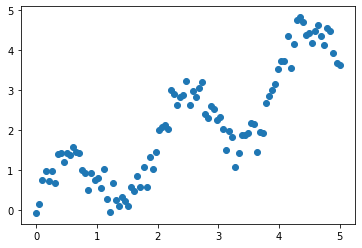

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y) ##已算好所有關係 並且regr_lin已固定為此x,y的關係

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.5506104449955908


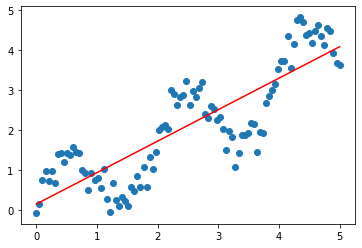

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [14]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5,k**6] for k in x])  # add k**6 to try it
print(X_poly.shape) ##有五個 會自動算出w1,w2,w3,w4,w5的權重

(100, 6)


In [15]:
regr_poly = LinearRegression()

In [16]:
regr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

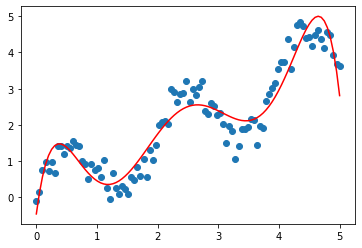

In [17]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [18]:
print('Coefficients: ', regr_poly.coef_) ##會算出五個斜率 if use k**6 there will be 6 斜率
print('interception: ', regr_poly.intercept_)

Coefficients:  [ 12.6889531  -27.69997522  23.50268718  -9.10617129   1.63717014
  -0.11074039]
interception:  -0.45294286028825415


In [19]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b ##現在X_poly是100*6 W是6*1 所以要做轉置矩陣

array([-0.45294286,  0.12022642,  0.56943684,  0.91080176,  1.15913883,
        1.32803122,  1.42988759,  1.47600067,  1.47660453,  1.44093055,
        1.37726207,  1.29298766,  1.19465313,  1.08801221,  0.97807584,
        0.86916026,  0.76493362,  0.66846143,  0.58225055,  0.50829194,
        0.44810205,  0.40276292,  0.37296089,  0.35902408,  0.36095847,
        0.37848268,  0.41106145,  0.45793776,  0.51816368,  0.59062979,
        0.67409343,  0.76720548,  0.86853594,  0.97659807,  1.0898713 ,
        1.20682278,  1.32592759,  1.44568767,  1.56464937,  1.68141976,
        1.79468149,  1.90320649,  2.00586817,  2.10165247,  2.18966744,
        2.26915157,  2.33948083,  2.40017428,  2.45089845,  2.49147039,
        2.52185931,  2.54218703,  2.55272697,  2.55390195,  2.54628054,
        2.53057217,  2.50762092,  2.4783979 ,  2.44399244,  2.4056018 ,
        2.36451971,  2.3221235 ,  2.27985988,  2.23922952,  2.20177014,
        2.16903842,  2.14259053,  2.12396129,  2.11464213,  2.11

In [20]:
regr_poly.predict(X_poly) ##兩種都可以

array([-0.45294286,  0.12022642,  0.56943684,  0.91080176,  1.15913883,
        1.32803122,  1.42988759,  1.47600067,  1.47660453,  1.44093055,
        1.37726207,  1.29298766,  1.19465313,  1.08801221,  0.97807584,
        0.86916026,  0.76493362,  0.66846143,  0.58225055,  0.50829194,
        0.44810205,  0.40276292,  0.37296089,  0.35902408,  0.36095847,
        0.37848268,  0.41106145,  0.45793776,  0.51816368,  0.59062979,
        0.67409343,  0.76720548,  0.86853594,  0.97659807,  1.0898713 ,
        1.20682278,  1.32592759,  1.44568767,  1.56464937,  1.68141976,
        1.79468149,  1.90320649,  2.00586817,  2.10165247,  2.18966744,
        2.26915157,  2.33948083,  2.40017428,  2.45089845,  2.49147039,
        2.52185931,  2.54218703,  2.55272697,  2.55390195,  2.54628054,
        2.53057217,  2.50762092,  2.4783979 ,  2.44399244,  2.4056018 ,
        2.36451971,  2.3221235 ,  2.27985988,  2.23922952,  2.20177014,
        2.16903842,  2.14259053,  2.12396129,  2.11464213,  2.11

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [21]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [22]:
sigma = 0.3

In [23]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [24]:
regr_rbf = LinearRegression()

In [25]:
regr_rbf.fit(X_rbf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

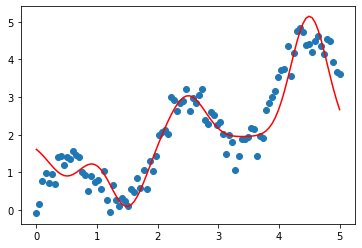

In [26]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [27]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.93419853 -1.75139734  1.19703372  0.09527722  3.30031468]
interception:  1.847698730710954


#### Comparison

In [28]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

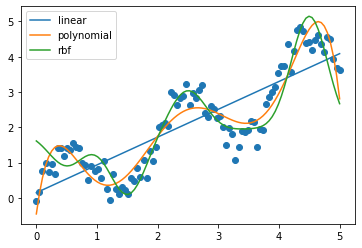

In [29]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [30]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5506104449955908


In [31]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.1747750885276419


In [32]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23859916613929052
